In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

plt.style.use('ggplot')
mpl.rcParams['axes.unicode_minus']=False

In [45]:
from IPython.display import set_matplotlib_formats

# Windows의 한글 폰트 설정
plt.rc('font', family='NanumGothic')

## Mac의 한글 폰트 설정
# plt.rc('font', family='AppleGothic')

plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

# 데이터 확인하기

**Data Fields**
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [5]:
train = pd.read_csv('train.csv', parse_dates=["datetime"])
print(train.shape)
train.head(20)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [7]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

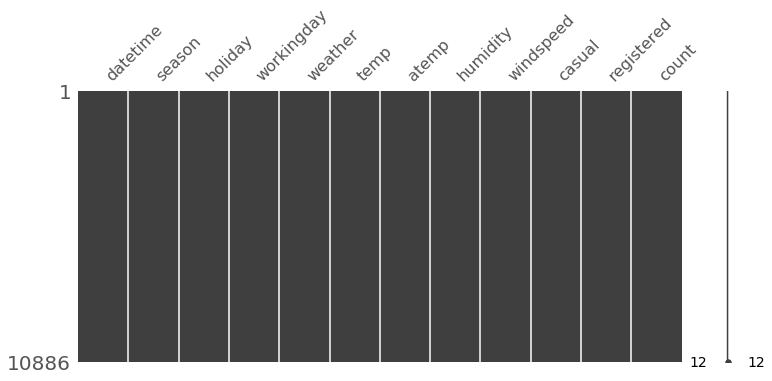

In [10]:
import missingno as msno

msno.matrix(train, figsize=(12,5))

In [13]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
print(train.shape)
train.head()

(10886, 18)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## 그래프로 시각화

[Text(0, 0.5, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

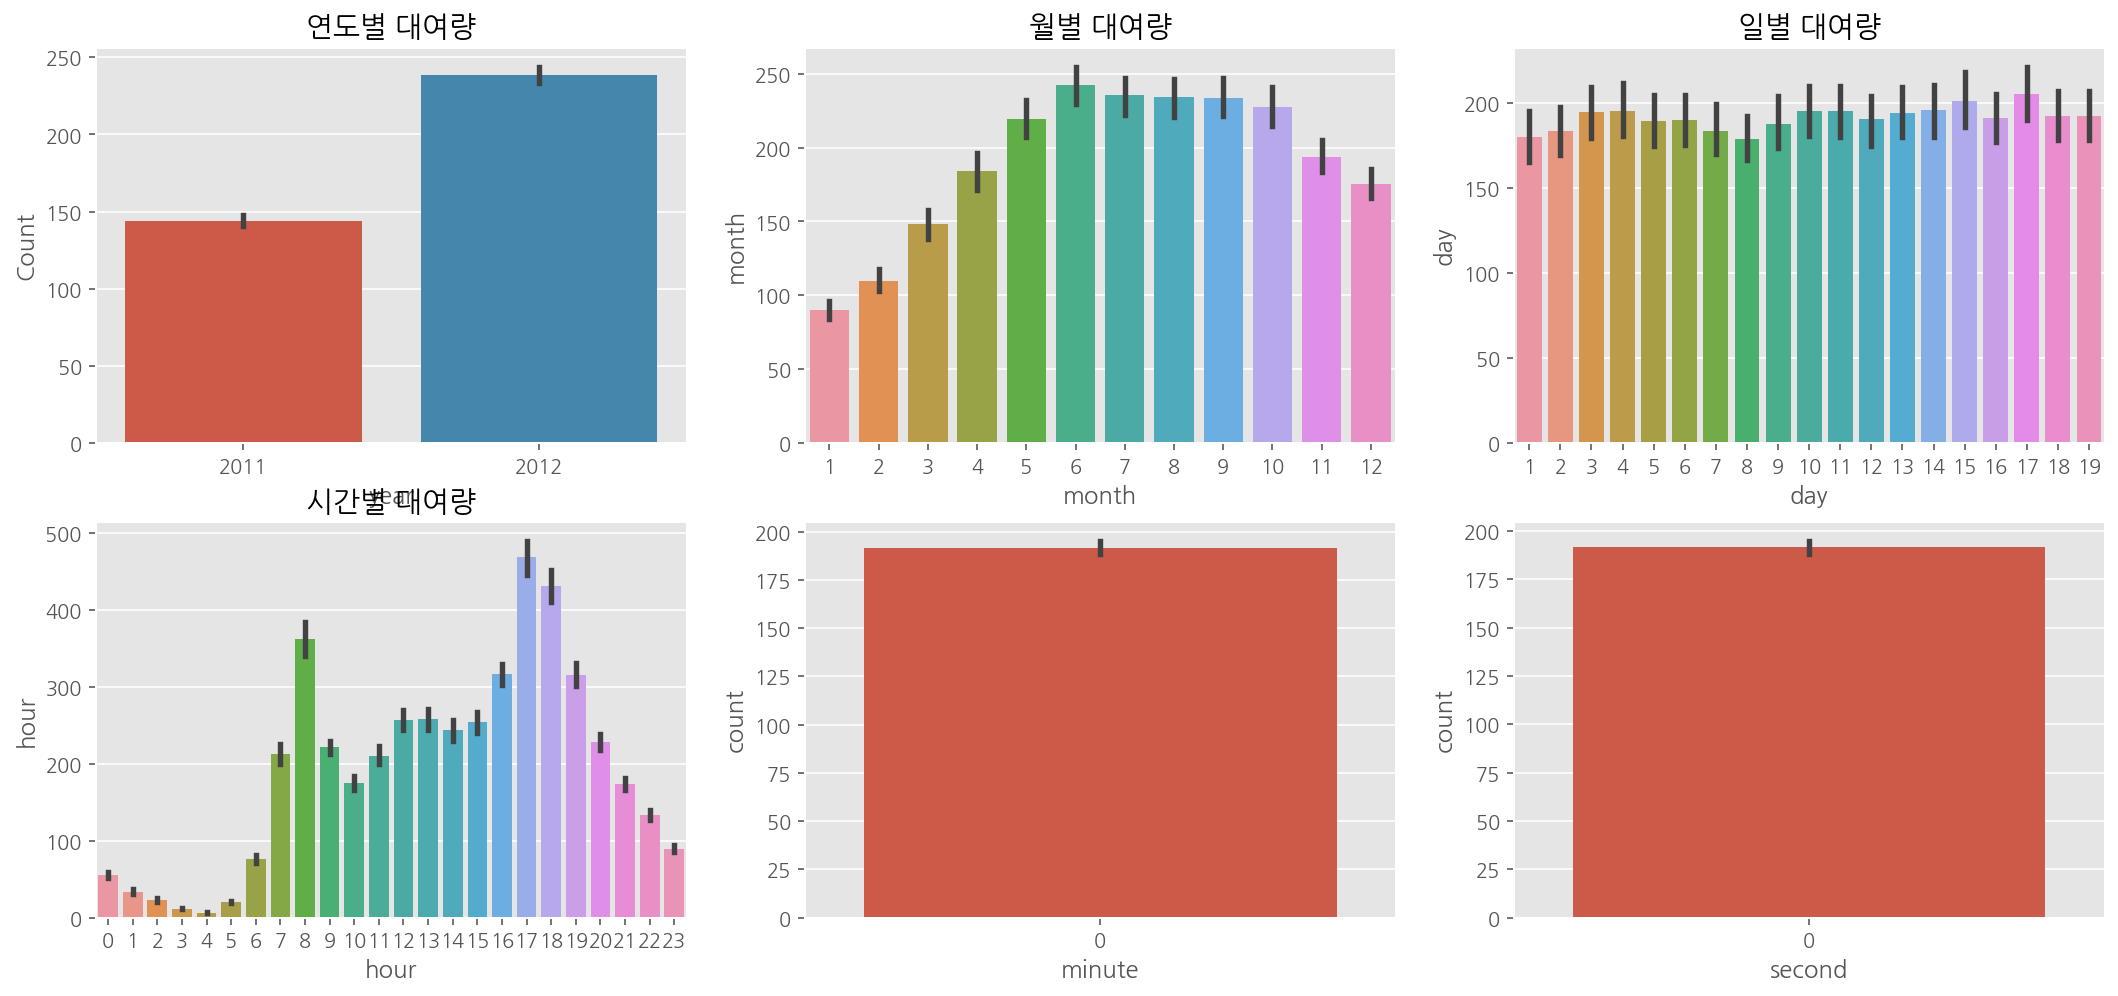

In [46]:
import warnings
warnings.filterwarnings(action='ignore')

figure, ((ax1, ax2, ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)
sns.barplot(data=train, x='minute', y='count', ax=ax5)
sns.barplot(data=train, x='second', y='count', ax=ax6)

ax1.set(ylabel='Count', title="연도별 대여량")
ax2.set(ylabel='month', title="월별 대여량")
ax3.set(ylabel='day', title="일별 대여량")
ax4.set(ylabel='hour', title="시간별 대여량")


- 연도별 대여량은 2012년이 더 많다
- 월별 대여량은 6월에 가장 많고 1월에 가장 적다
- 일별 대여량은 19일까지만 있고 나머지 날짜는 test.csv에 있음. 피처로 사용할 수 없음
- 시간별 대여량은 출퇴근 시간에 대여가 가장 많음
- 분, 초 대여량은 값이 0으로 의미가 없음

[Text(0.5, 0, 'Working day'), Text(0.5, 1.0, '근무일 여부에 따른대여량')]

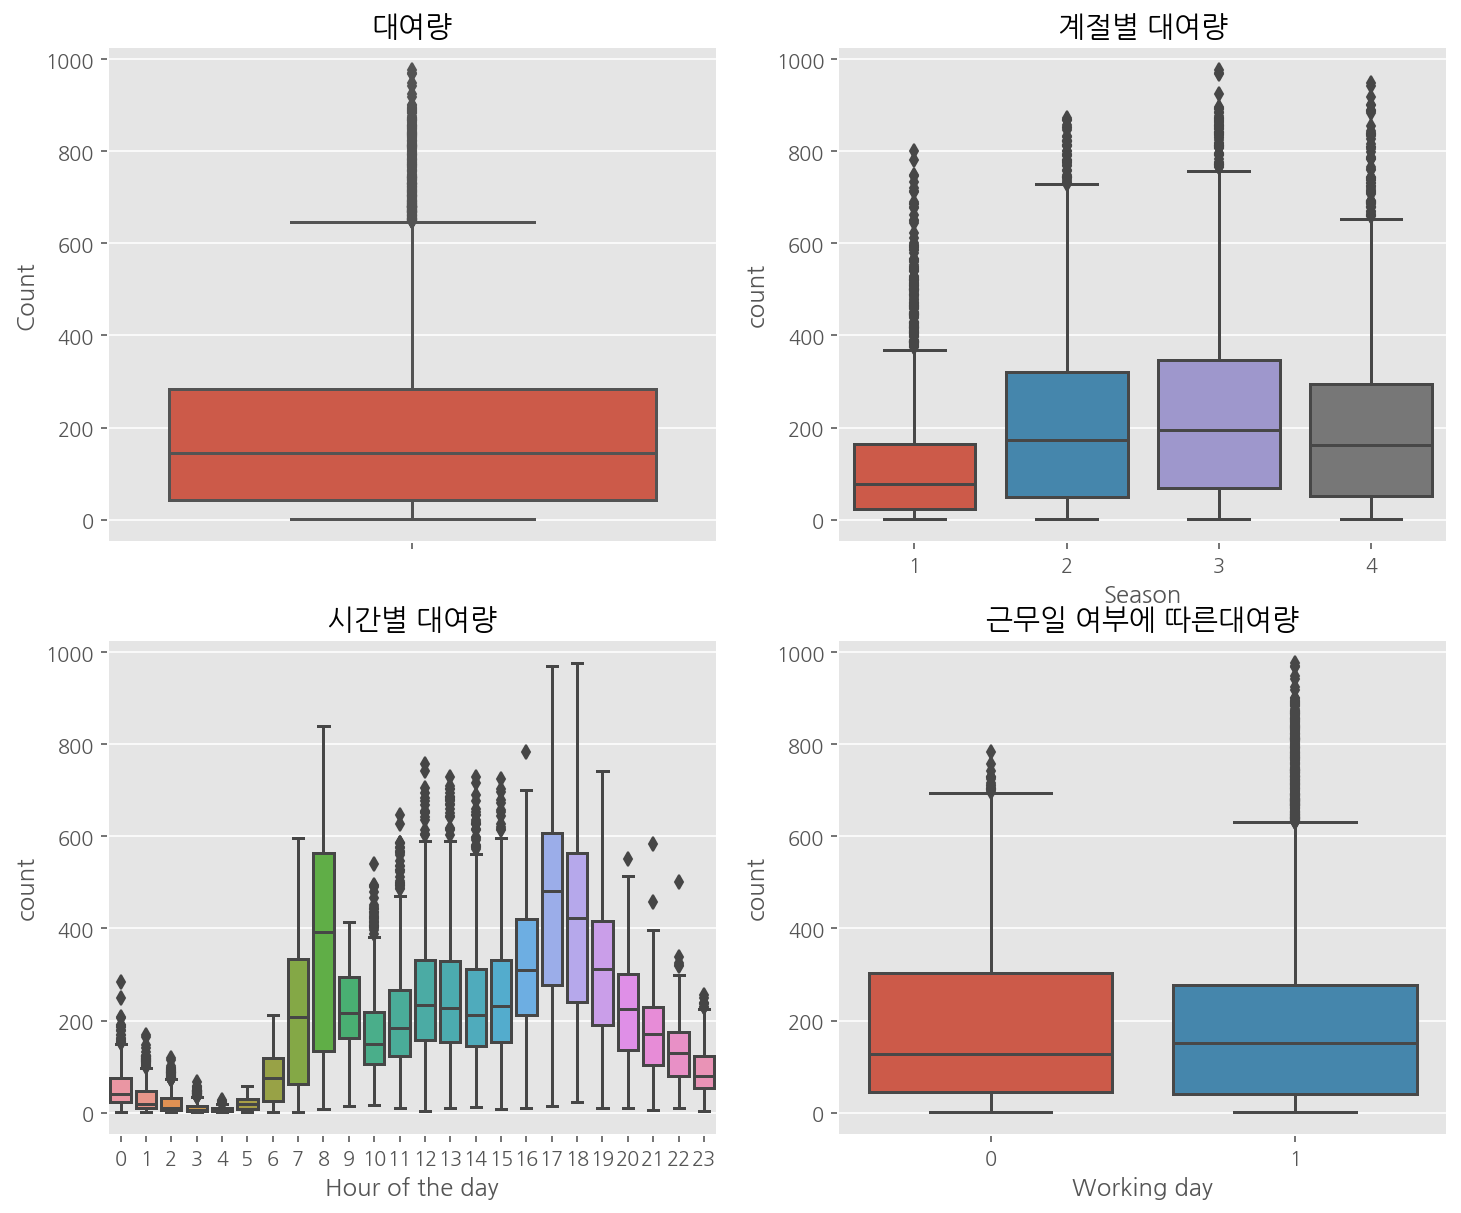

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)

sns.boxplot(data=train, y="count", orient="v", ax=axes[0][0])
sns.boxplot(data=train, y="count", x='season', orient="v", ax=axes[0][1])
sns.boxplot(data=train, y="count", x='hour', orient="v", ax=axes[1][0])
sns.boxplot(data=train, y="count", x='workingday', orient="v", ax=axes[1][1])

axes[0][0].set(ylabel='Count', title ='대여량')
axes[0][1].set(xlabel='Season', title ='계절별 대여량')
axes[1][0].set(xlabel='Hour of the day', title ='시간별 대여량')
axes[1][1].set(xlabel='Working day', title ='근무일 여부에 따른대여량')

In [24]:
train['dayofweek'] = train['datetime'].dt.dayofweek
print(train.shape)

(10886, 20)


In [25]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

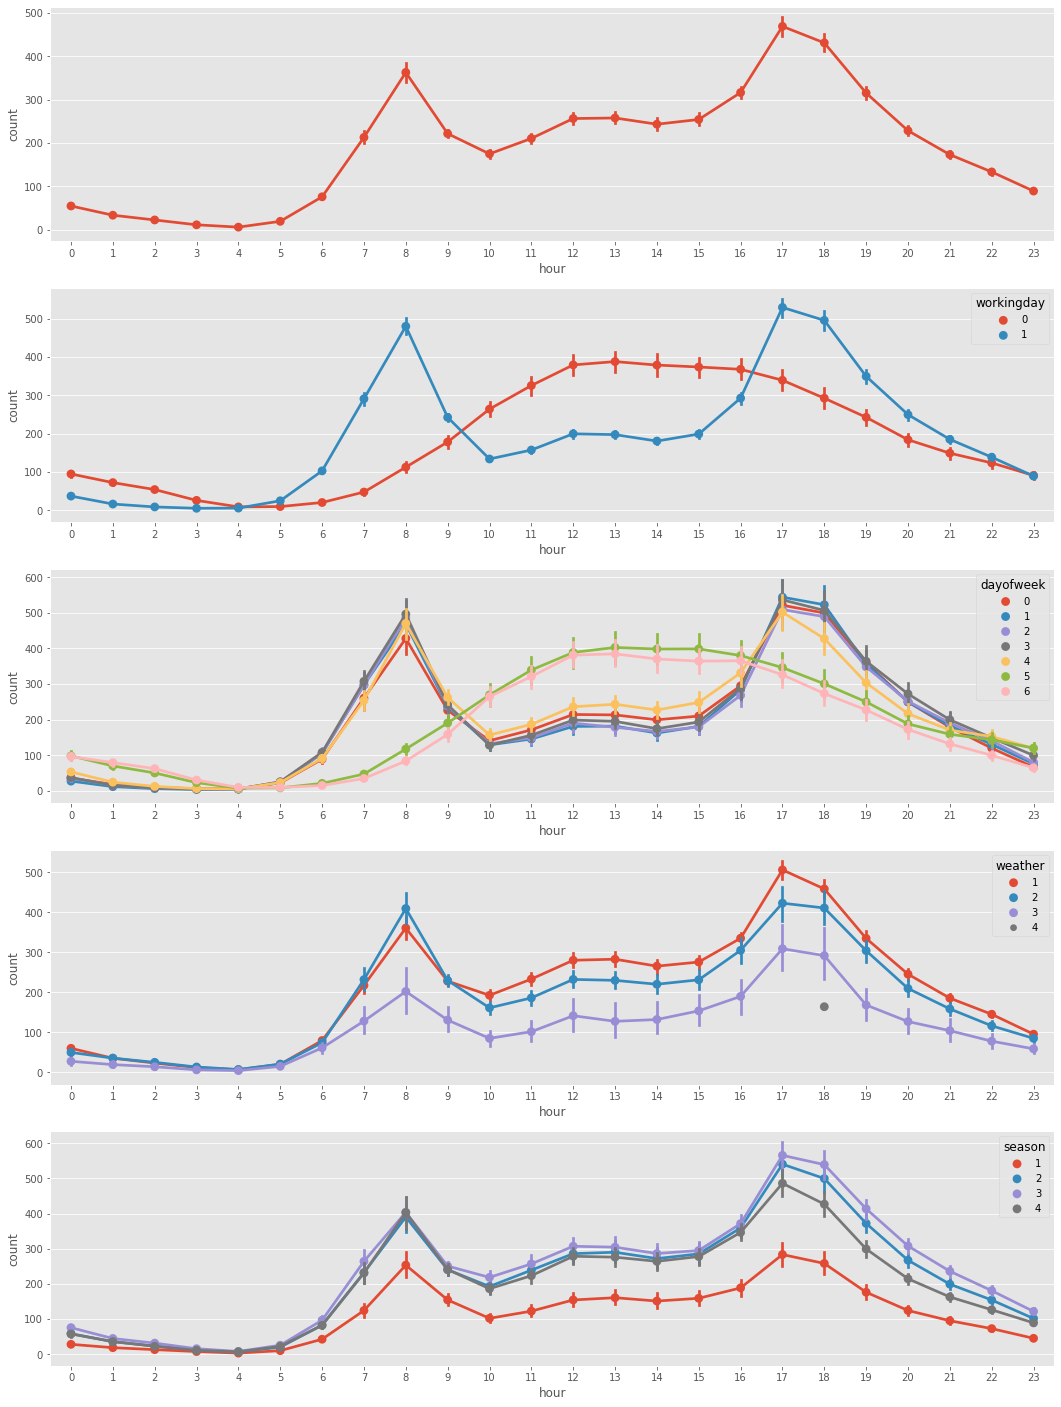

In [26]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x='hour', y='count', ax=ax1)
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax2)
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax3)
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=ax4)
sns.pointplot(data=train, x='hour', y='count', hue='season', ax=ax5)

In [29]:
# 상관관계
corrMatt = train[['temp','atemp','casual','registered','humidity','windspeed','count']]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] =False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


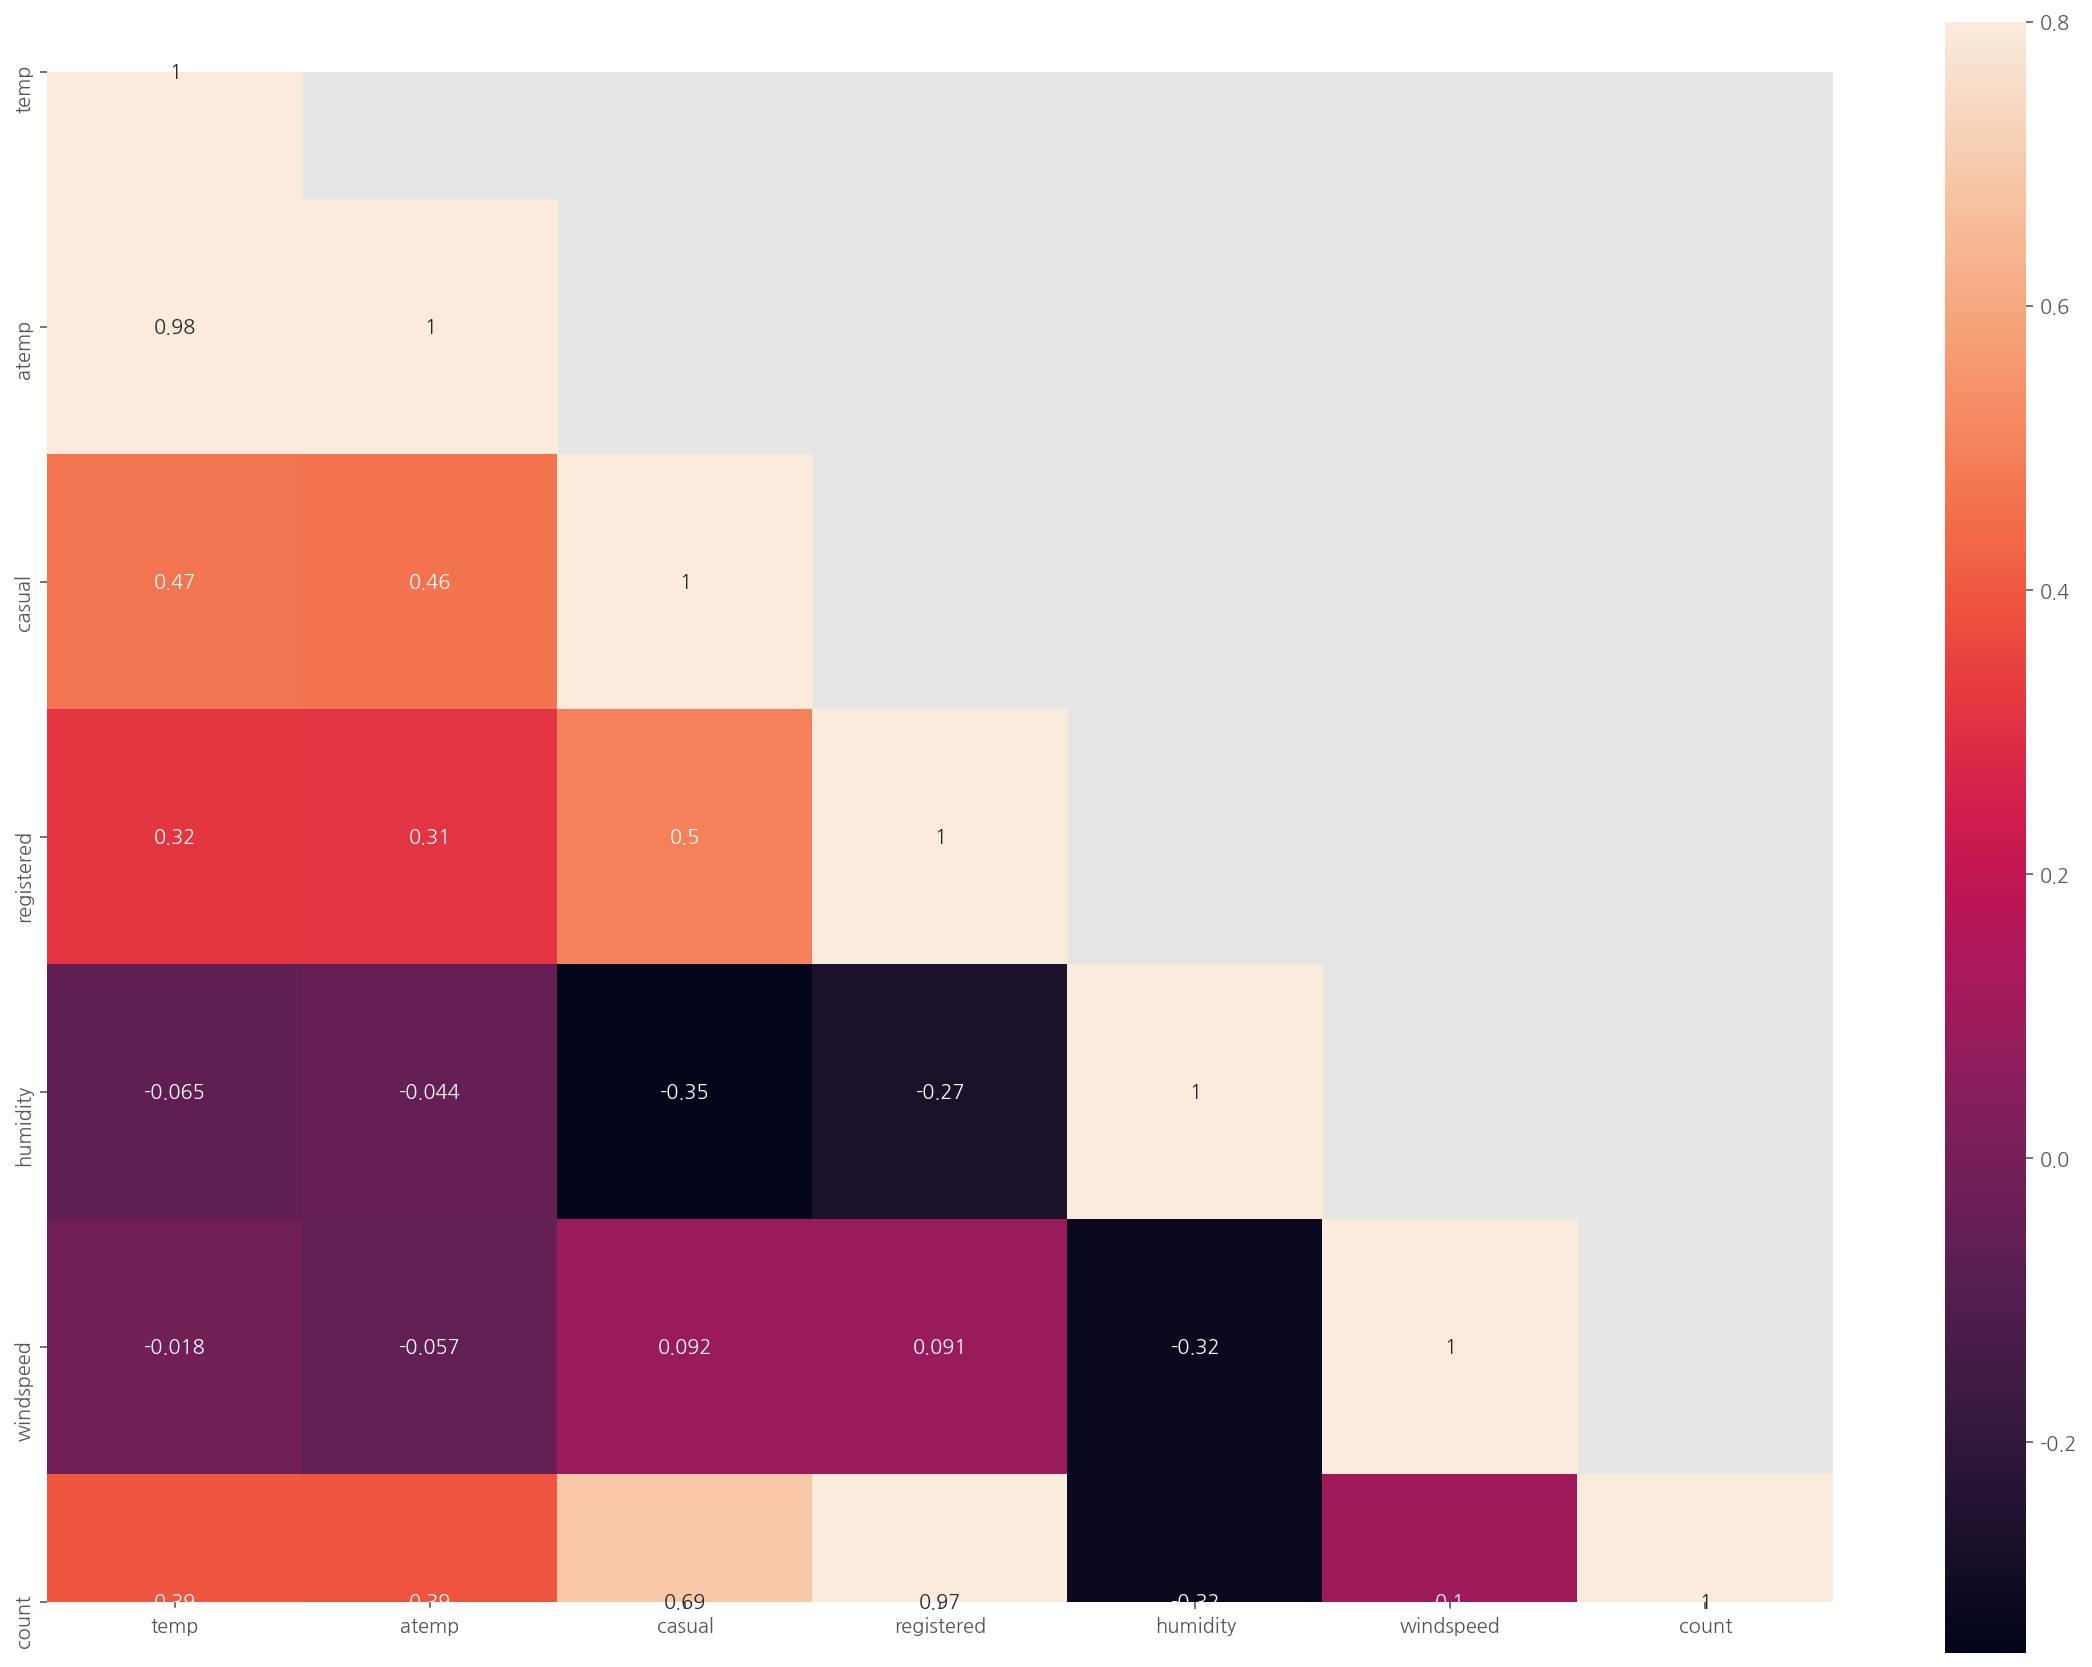

In [48]:
# Heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20,15)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

- 온도, 습도, 풍속은 거의 상관관계가 없다.
- 대여량과 가장 높은 지표는 registered로 등록된 대여자가 많지만, test데이터에는 없다.
- atemp와 temp는 상관관계가 높지만 온도와 체감온도를 피처로 사용하기에 적합하지 않을 수 있다.

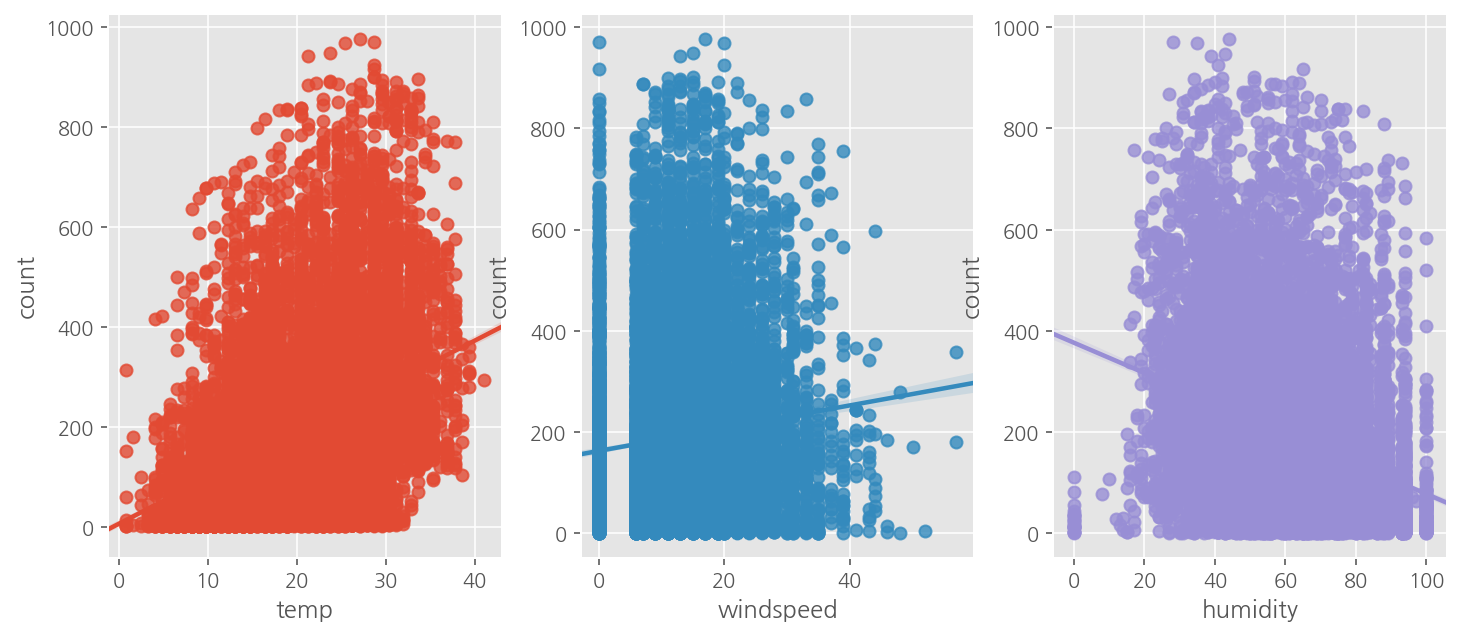

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)

sns.regplot(x='temp', y='count', data=train, ax=ax1)
sns.regplot(x='windspeed', y='count', data=train, ax=ax2)
sns.regplot(x='humidity',y='count',data=train, ax=ax3)

- 풍속은 0이 몰려있는 숫자가 많아, 관측되지 않은 수치에 대해 기록된 것이 아닐까 추측

In [42]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "year_month"]].head()

(10886, 21)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


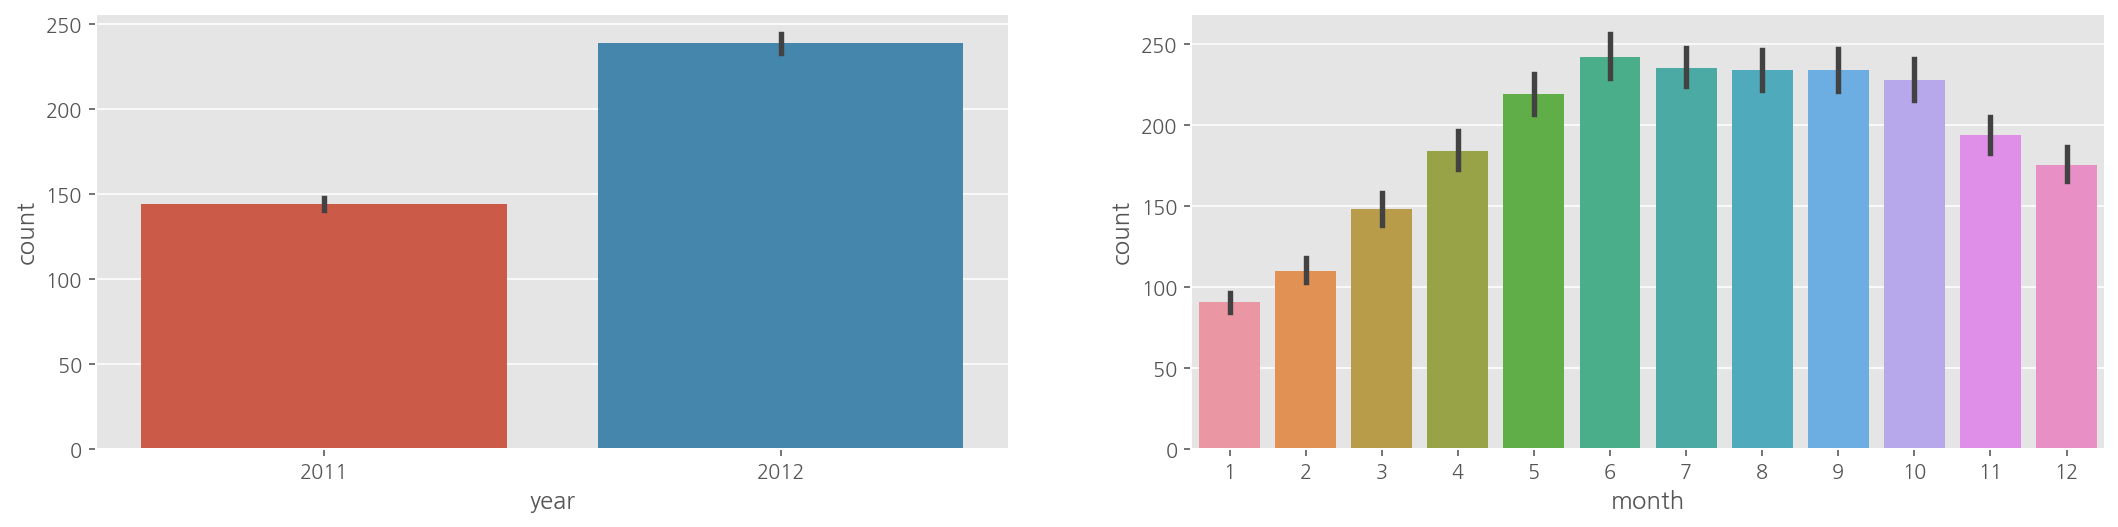

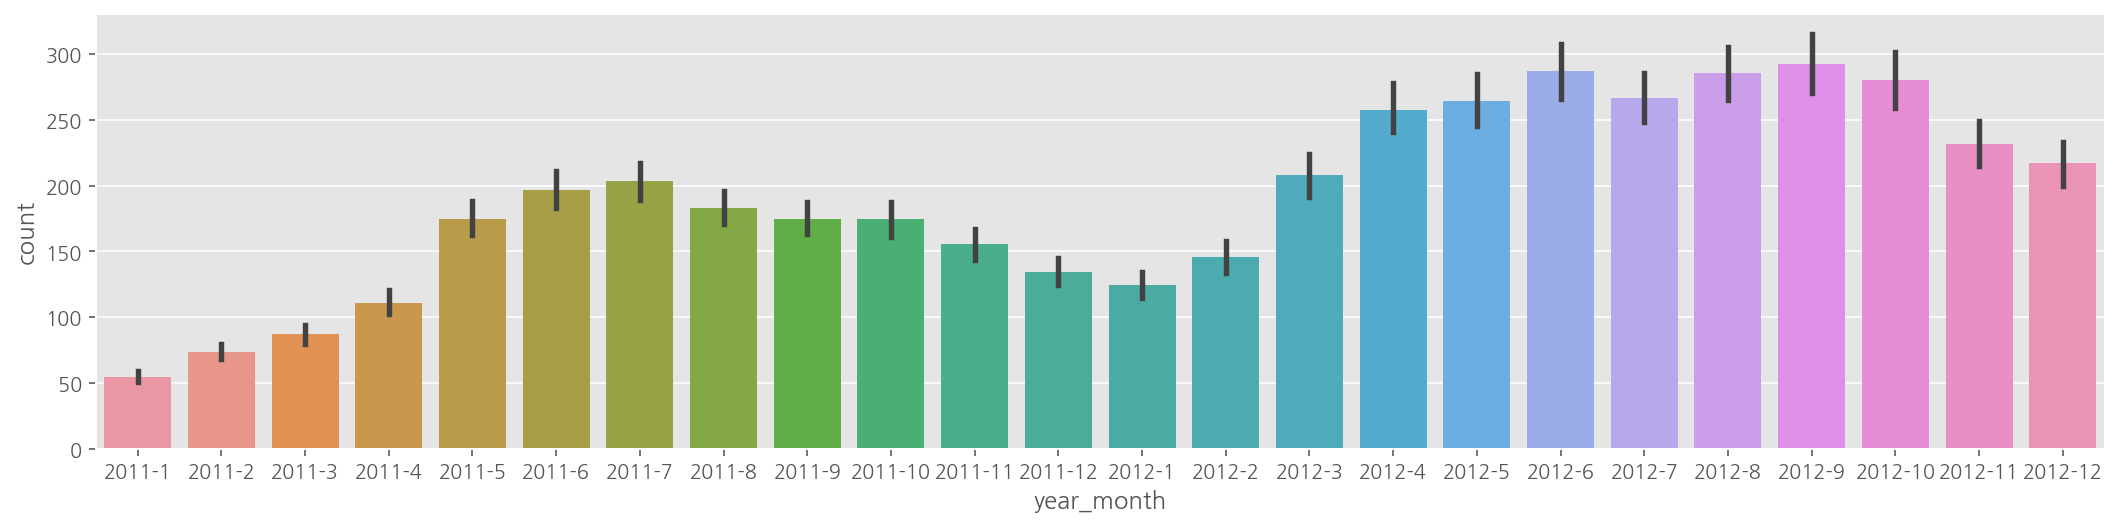

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(18,4)

sns.barplot(x='year', y='count', data=train, ax=ax1)
sns.barplot(x='month', y='count', data=train, ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)

a =sns.barplot(x='year_month', y='count', data=train, ax=ax3)

- 2011년보다 2012년의 대여량이 더 많다.
- 2011년과 2012년의 월별 데이터를 이어보면 전체적으로 증가하는 추세이다.

In [52]:
# trainWithoutOutliers
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 21)
(10739, 21)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.        , 0.        , 0.        , ..., 6.59578051, 6.5971457 ,
         6.59850903])),
 (1.4096846101542908, 4.523106928071492, 0.9537631807794263))

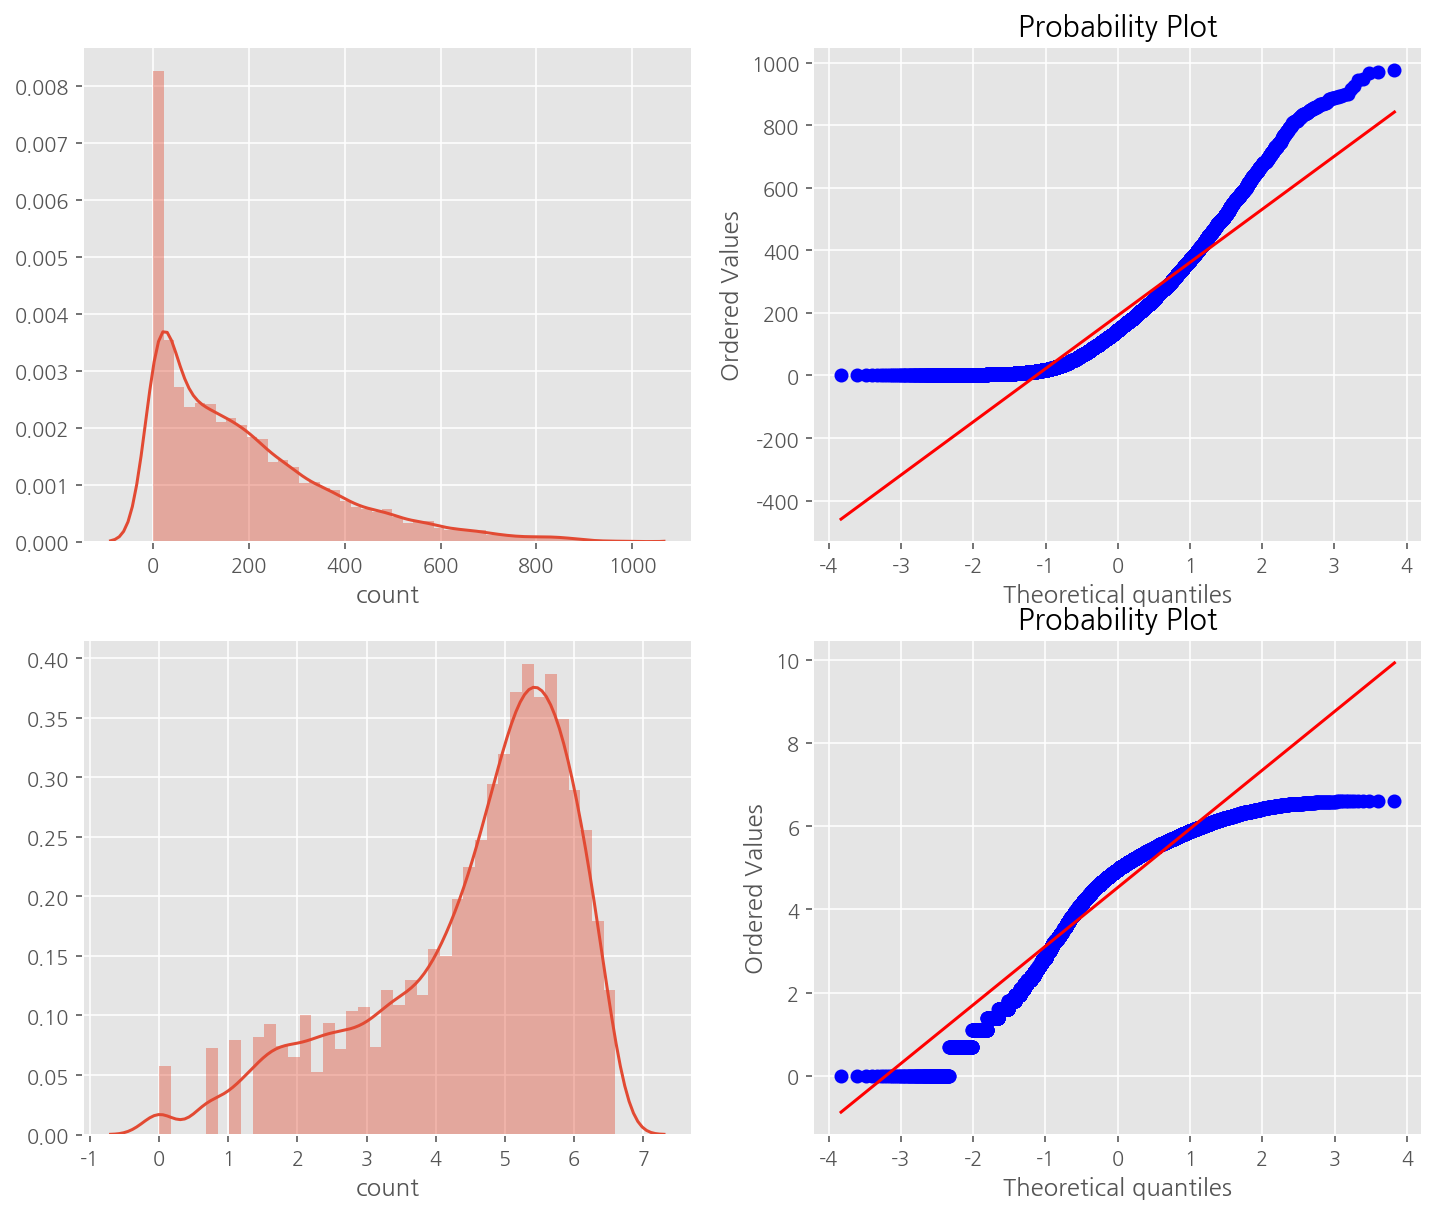

In [57]:
# count 값의 데이터 분포도를 파악

figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12,10)

# distplot과 probplot(Q-Q plot)을 통해 정규분포인지 확인
# 정규분포인 경우 probplot이 직선의 형태로 나타남
sns.distplot(train['count'], ax=axes[0][0])
stats.probplot(train['count'], dist='norm',fit=True, plot=axes[0][1])

sns.distplot(np.log(trainWithoutOutliers['count']), ax=axes[1][0])
stats.probplot(np.log(trainWithoutOutliers['count']), dist='norm',fit=True, plot=axes[1][1])

# Feature Engineering

In [58]:
train = pd.read_csv("train.csv", parse_dates=['datetime'])
print(train.shape)
test = pd.read_csv("test.csv", parse_dates=['datetime'])
print(test.shape)

(10886, 12)
(6493, 9)


In [60]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [61]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek
test.shape

(6493, 16)

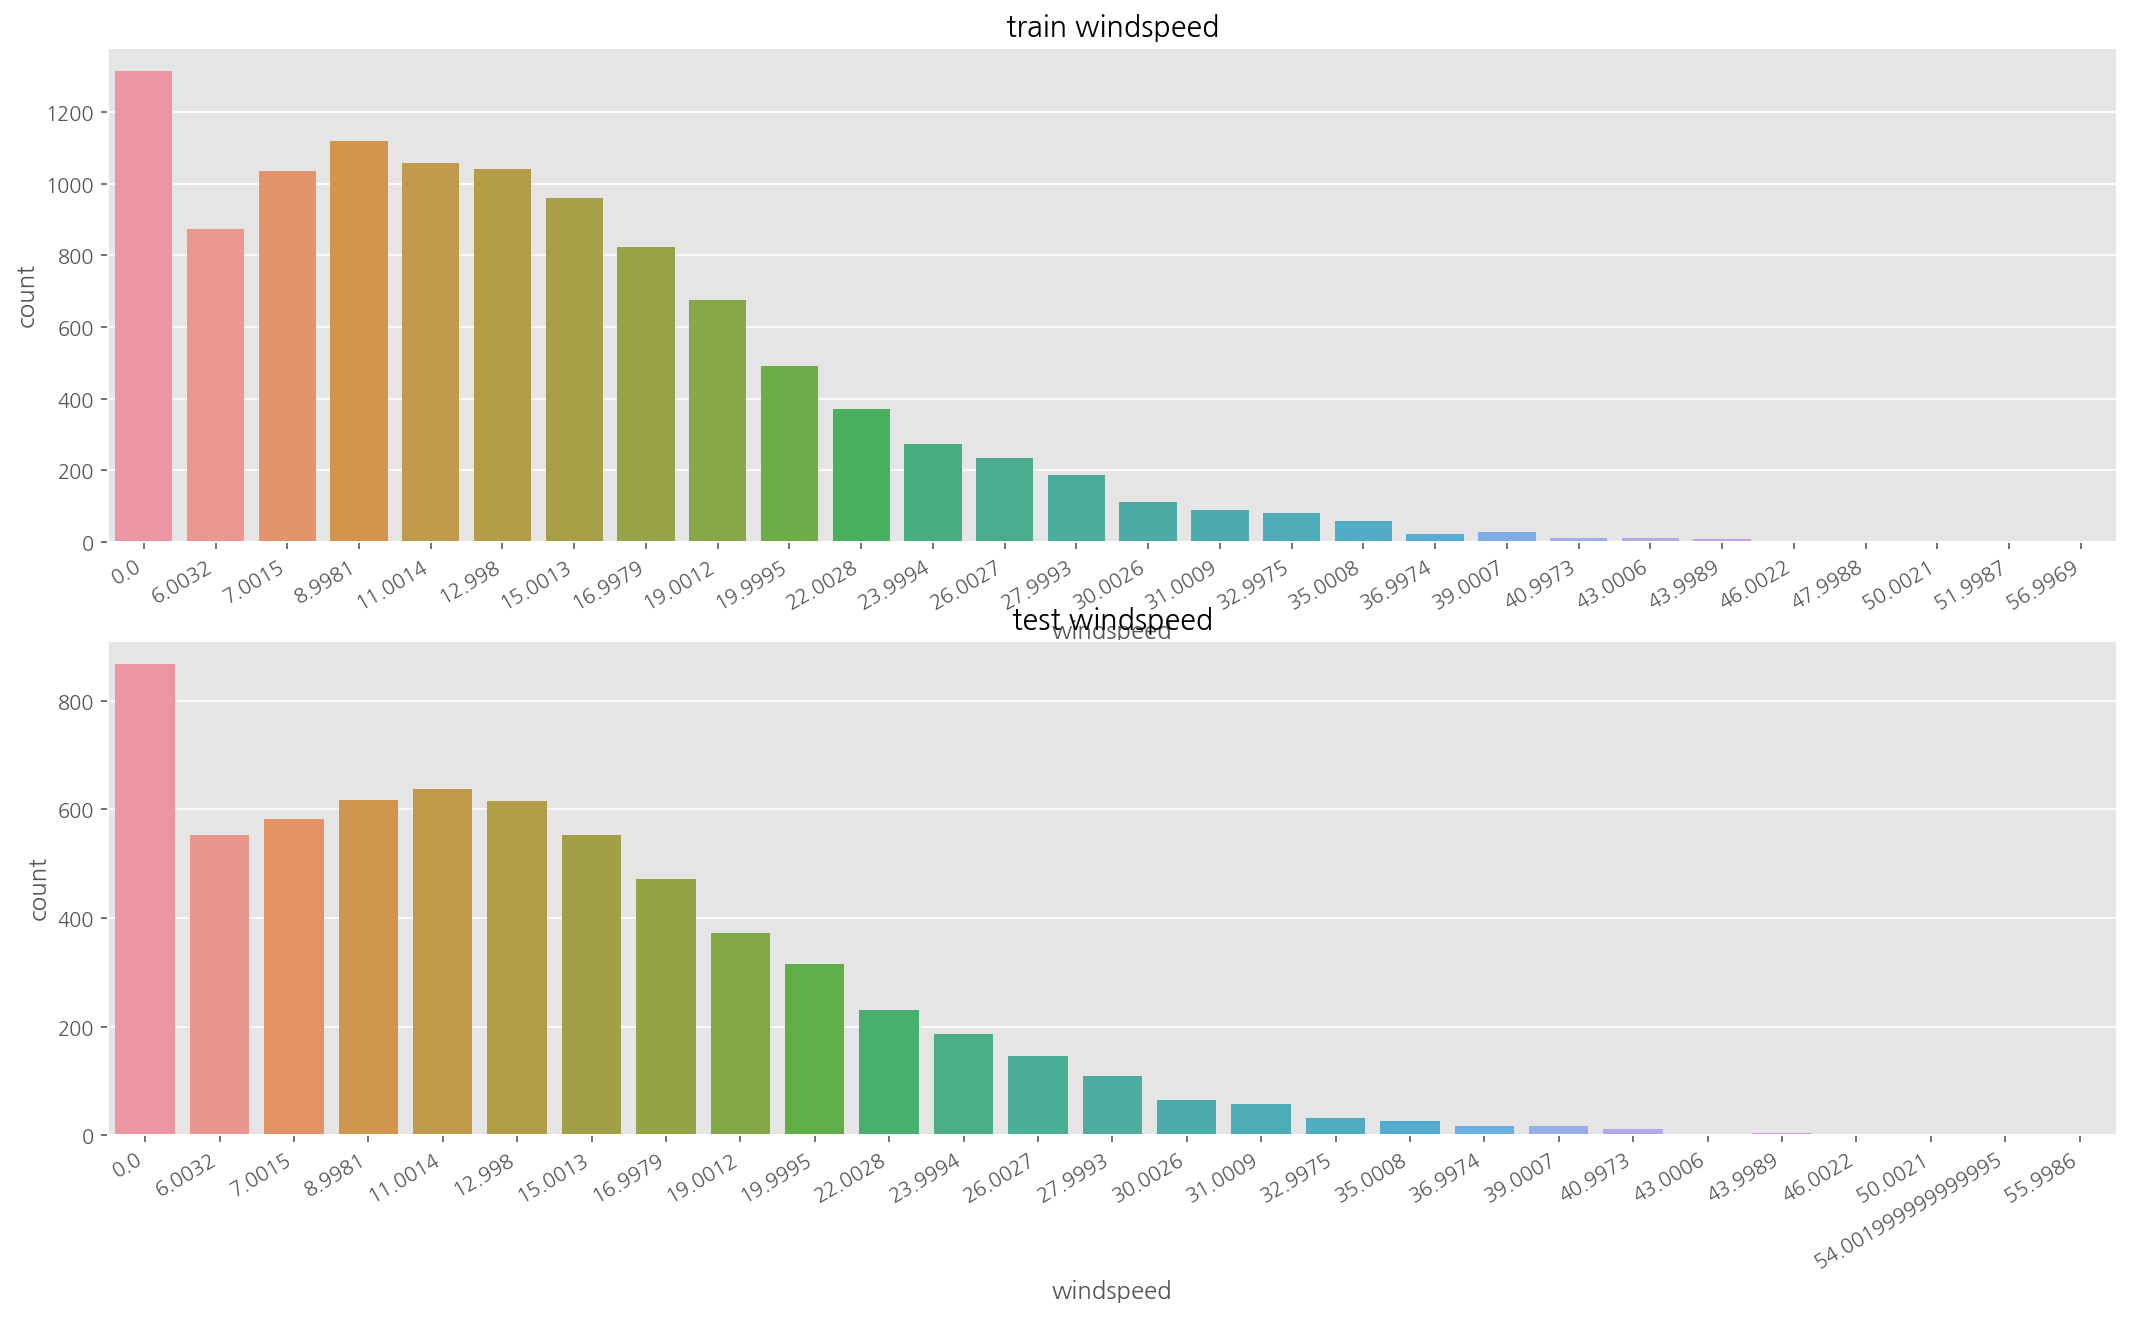

In [62]:
# widspeed 풍속에 0 값이 가장 많다. => 잘못 기록된 데이터를 고쳐 줄 필요가 있음
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,10)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count',title="test windspeed")
sns.countplot(data=test, x="windspeed", ax=axes[1])

- 풍속이 0인 값에 특정값을 넣어준다
- 평균을 구해서 일괄적으로 넣는 것은 예측의 정확도를 높이는데 도움이 될 것 같지 않으므로,
- 머신러닝으로 예측을 해서 풍속값을 대체함

In [63]:
trainWind0 = train.loc[train['windspeed'] == 0]
trainWindNot0 = train.loc[train['windspeed'] != 0]
print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 19)
(9573, 19)


In [72]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    
    #풍속이 0인것과 아닌 것을 구분.
    dataWind0 = train.loc[train['windspeed'] == 0]
    dataWindNot0 = train.loc[train['windspeed'] != 0]
    
    # 풍속을 예측할 피처를 선택
    wCol = ['season','weather','humidity','month','temp','year','atemp']
    
    # 풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다.
    dataWindNot0['windspeed'] = dataWindNot0['windspeed'].astype('str')
    
    # 랜덤포레스트 분류기를 사용한다.
    rfModel_wind = RandomForestClassifier()
    
    # wCol에 있는 피처의 값을 바탕으로 풍속을 학습시킨다.
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0['windspeed'])
    
    # 학습한 값을 바탕으로 풍속이 0으로 기록된 데이터의 풍속을 예측한다.
    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])
    
    # 값을 다 예측 후 비교해보기 위해, 예측한 값을 넣어줄 데이터 프레임을 새로 만든다.
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    # 값이 0으로 기록된 풍속에 대해 예측한 값을 넣어준다
    predictWind0['windspeed'] = wind0Values
    
    # dataWindNot0 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터 프레임을 합쳐준다.
    data = predictWindNot0.append(predictWind0)
    
    # 풍속의 데이터 타입을 float로 지정해준다
    data['windspeed'] = data['windspeed'].astype('float')
    
    data.reset_index(inplace=True)
    data.drop('index', axis=1, inplace=True)
    
    return data
    

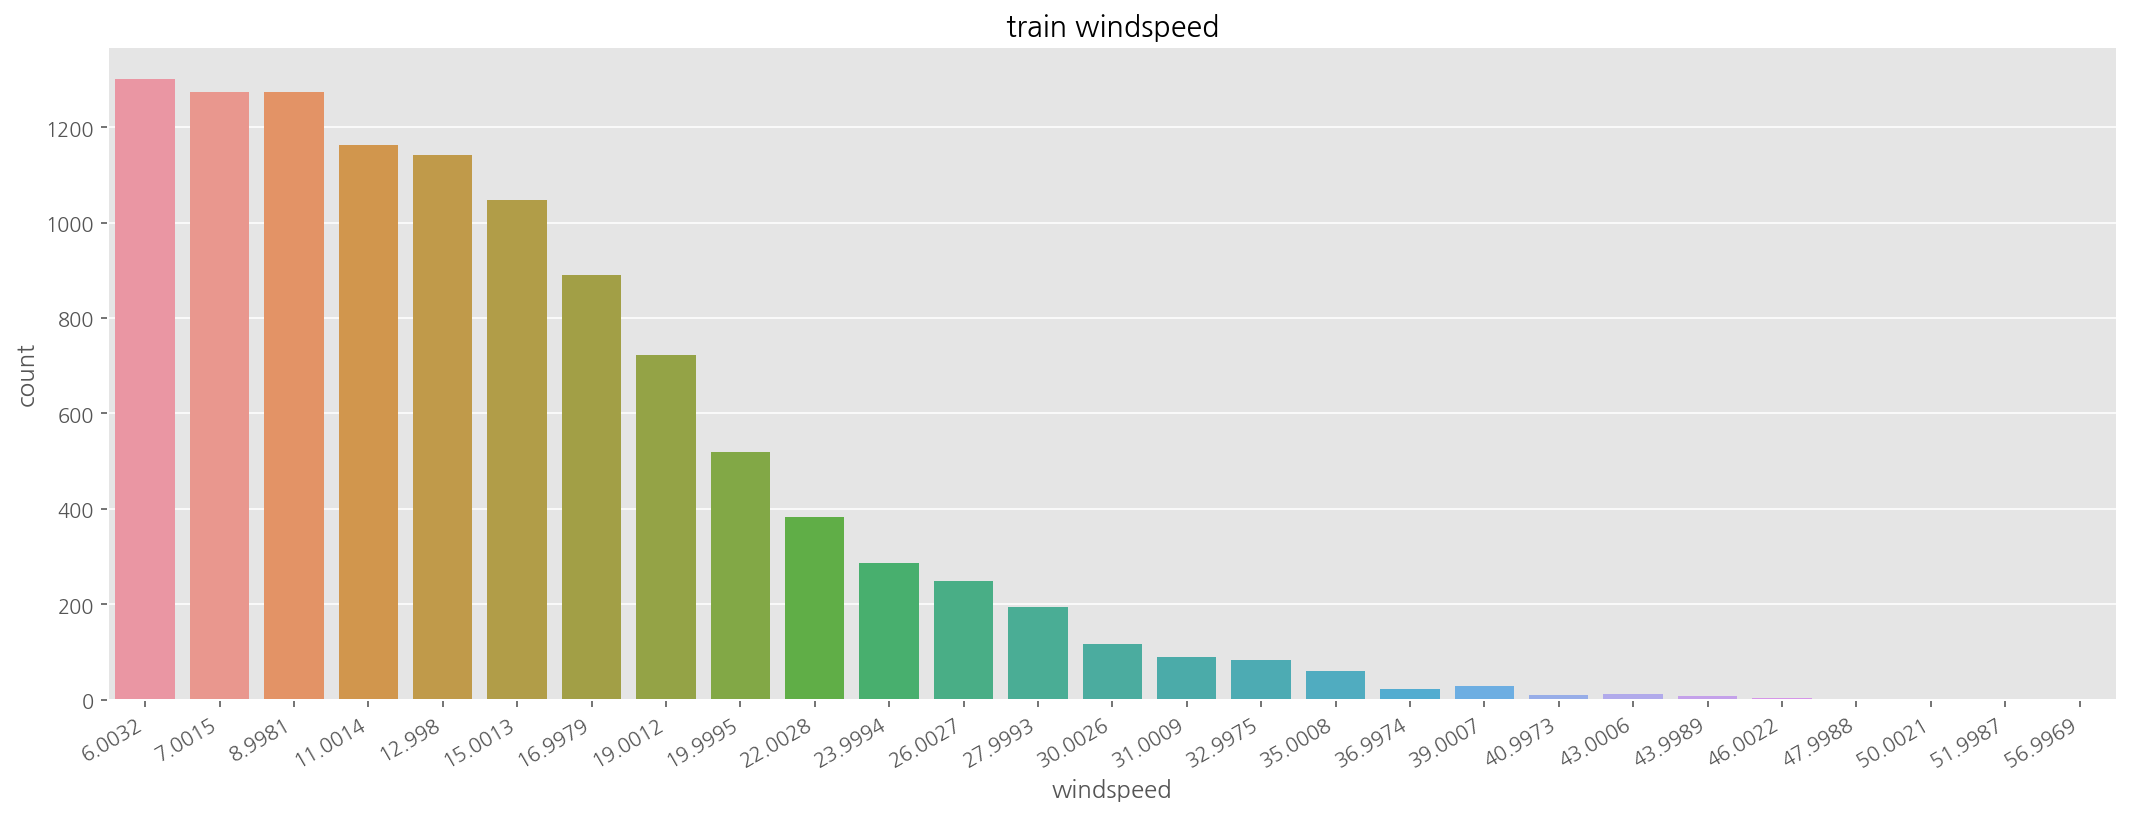

In [73]:
# 0값을 조정한다.
train = predict_windspeed(train)
# test = predict_windspeed(test)

# widspeed 의 0값을 조정한 데이터를 시각화
fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=ax1)

## Feature Selection

- 신호와 잡음을 구분해야 한다
- 피쳐를 하나씩 추가하고 변경해 가면서 성능이 좋지 않은 피쳐는 제거하도록 한다

In [75]:
# 연속형 feature와 범주형 feature
# 연속형 feature = ['temp','humidity','windspeed','atemp']
# 범주형 feature의 타입을 category로 변경해준다. 

categorical_feature_names = ['season','holiday','workingday','weather','dayofweek',
                            'month','year','hour']

for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [79]:
feature_names = ["season", "weather","temp","atemp","humidity","windspeed","year",
                "hour","dayofweek","holiday","workingday"]
feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [81]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,2,9.84,12.880,75,6.0032,2011,5,5,0,0
1,1,1,15.58,19.695,76,16.9979,2011,10,5,0,0
2,1,1,14.76,16.665,81,19.0012,2011,11,5,0,0
3,1,1,17.22,21.210,77,19.0012,2011,12,5,0,0
4,1,2,18.86,22.725,72,19.9995,2011,13,5,0,0


In [82]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [90]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

# SCORE

**RMSLE**
- 과대평가 된 항목보다는 과소평가 된 항목에 패널티를 준다.
- 오차(error)를 제곱(square)해서 평균(Mean)한 값의 제곱근(Root)으로 값이 작을수록 정밀도가 높다.
- 0에 가까운 값이 나올수록 정밀도가 높은 값이다.
- 잔차(residual)에 대한 평균에 로그를 씌운 값이다-> 과대평가 된 항목보다 과소평가 된 항목에 패널티를 주기 위해
- 정답에 대한 오류를 숫자로 나타낸 값으로 값이 클 수록 오차가 크다는 의미다.

In [100]:
# RMSLE 계산함수

from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 뺴주고 제곱을 해준다.
    # difference = (log_predict - log_actual) ** 2
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # 평균을 구한다
    mean_difference = difference.mean()
    
    # 루트를 씌운다
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

**K-Fold**

- 일반화 성능을 측정하기 위해 데이터를 여러 번 반복해서 나누고 여러 모델을 학습한다. 
- 첫번째 폴드를 테스트 세트로 사용하고 나머지 폴드를 훈련세트로 사용하여 학습한다
- 나머지 훈련세트로 만들어진 세트의 정확도를 첫번째 폴드로 평가한다.
- 다음은 두번째 폴드가 테스트 세트가 되고, 나머지 폴드의 훈련세트를 두번쨰 폴드로 정확도를 측정한다.
- 이렇게 훈련세트와 테스트세트로 나누는 N개의 분할마다 정확도를 측정하여 평균값을 낸게 정확도가 된다.

In [101]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# RandomForest

In [102]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []
model = RandomForestRegressor(n_estimators =100,
                             n_jobs = -1,
                             random_state = 0)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [103]:
%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()

# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

Wall time: 6.68 s
Score= 0.33059


## Train

In [104]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [105]:
# prediction
prediction = model.predict(X_test)

print(prediction.shape)
prediction[0:10]

(6493,)


array([ 12.26,   4.76,   3.96,   3.48,   3.11,   6.52,  38.39, 105.31,
       236.98, 136.33])

[Text(0.5, 1.0, 'Test')]

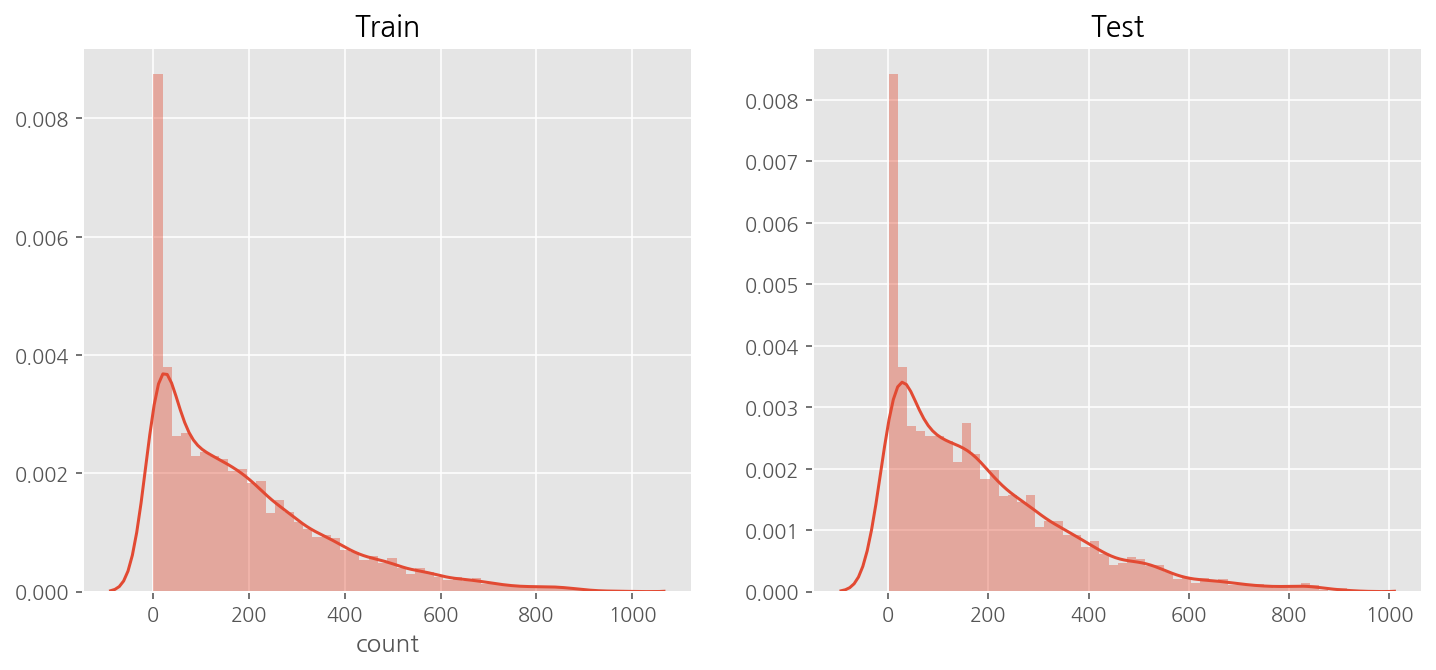

In [109]:
# visualization
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)

sns.distplot(y_train, ax=ax1, bins=50)
ax1.set(title = "Train")

sns.distplot(prediction, ax=ax2, bins=50)
ax2.set(title = "Test")

## submit

In [111]:
submission = pd.read_csv("sampleSubmission.csv")
submission

submission["count"] = prediction

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.26
1,2011-01-20 01:00:00,4.76
2,2011-01-20 02:00:00,3.96
3,2011-01-20 03:00:00,3.48
4,2011-01-20 04:00:00,3.11


In [112]:
submission.to_csv("Score_{0:.5f}_submission.csv".format(score), index=False)